# Visualizations of 1994-95 CPS Census Data

### Olivia Leeson, Ruby Vaszquez Pena, Crystal Todd, Kelly Bean

#### MSDS 7331 Data Mining, Southern Methodist University 

______________________________________________________________

## Business Understanding

The US Census Bureau frequently collects data on a sample of people living in the U.S. for social and economic research. The dataset used in this project is a selection of data from the 1994-1995 Current Population Survey performed by the US Census Bureau. 
The data focuses on employment information of 199,523 individuals including their age, class, occupation, and education among other attributes. See URL: http://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29. There are a total of 42 attributes. 
It is important to note that one of these attributes, "Instance Weight", is the weight that each record represents in relation to the entire population due to stratified sampling. 

This particular subset of data from the Current Population Survey can help us understand the correlations between particular attributes of an individual and their total income. We may be able to identify traits that correlate with low and high income earners. This information is used to inform government policy and decision-making for occupational and educational programs.

The dataset from UC Irvine's ML repository had been previously manipulated to create a variable indicating whether "total person income" is below or above 50,000.00, instinctively coded as "Above or Below 50000". This creates a binary classification problem for which we can try to predict whether an individual will make above or below $50,000 given the combination of attributes in our dataset. 

In [1]:
import pandas as pd
import numpy as np

#hides warning outputs
import warnings
warnings.filterwarnings('ignore')

#Read in data
census = pd.read_csv('CensusData.csv') #change this path if necessary
census.head()

,Age,Class of worker,Industry Code,Occupation Code,Education,Wage per hour,Enrolled in edu inst last wk,Marital Status,Major Industry Code,Major Occupation Code,...,Country of birth father,Country of birth mother,Country of birth self,Citizenship,Own business or self employed,fill inc questionnaire for veteran's admin,Veterans benefits,Weeks worked in year,Year,Above or Below 50000
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


_______________________________________________

## Data Meaning Type

Our first step is to take a look at each attribute within the census dataset. We start by identifying each variable type.

In [2]:
#output variable names and types
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
Age                                           199523 non-null int64
Class of worker                               199523 non-null object
Industry Code                                 199523 non-null int64
Occupation Code                               199523 non-null int64
Education                                     199523 non-null object
Wage per hour                                 199523 non-null int64
Enrolled in edu inst last wk                  199523 non-null object
Marital Status                                199523 non-null object
Major Industry Code                           199523 non-null object
Major Occupation Code                         199523 non-null object
Race                                          199523 non-null object
Hispanic Origin                               199523 non-null object
Sex                                           199523 non-null obj

Our **continuous variables** are: 
"Age", "Wage per hour", "Capital Gains", "Capital Losses", "Dividends from stocks", "Instance Weight", "Num persons worked for employer", "Weeks worked in year", and "Year". 

Our **categorical variables** are: 
"Class of worker", "Education", "Enrolled in edu inst last wk", "Marital Status", "Major Industry Code", "Major Occupation Code", "Race", "Hispanic Origin", "Sex", "Member of a Labor Union", "Reason for unemployment", "Full or Part Time", "Tax Filer Status", "Region of previous residence", "State of previous residence", "Househound and family stat", "Household summary in household", "Migration code-change in MSA", "Migration code-change in reg", "Migration code-move within reg", "Live in this house 1 year ago", "Migration prev res in sunbelt", "family members under 18", "Country of birth father", "Country of birth mother", "Country of birth self", "Citizenship", "fill inc questionnair for veteran's admin"

Our **nominal variables coded as integers** are: 
"Industry Code", "Occupation Code", "Own business or self employed", "Veterans benefits", "Above or Below 50000"

We are fortunate that many of the variables have self-describing attribute names. However, will need to reference the Census Bureau's documenation to understand the nominal variables coded as integers. The variable names from the original dataset are less descriptive. "Industry Code" is coded by the Census Bureau as "ADTIND", "Occupation Code" as "ADTOCC", "Own business or self employed" as "SEOTR", and "Veterans benefits" as "VETYN". 

The full technical documentation is here: https://www.census.gov/prod/techdoc/cps/cpsmar96.html

For analysis regarding these variables, we will have to refer to the technical documentation's data dictionary for decoding.

We also urge the reader to review the information presented in the names file accompanying the UC Irvine dataset to learn more about the variables included in this dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.names 

________________________________________________

## Data Quality

To verify data quality, we first count how many null values there exist for each attribute. Fortunately, in this data set, there are none:

In [3]:
#Count NA values
census.isnull().sum()

Age                                           0
Class of worker                               0
Industry Code                                 0
Occupation Code                               0
Education                                     0
Wage per hour                                 0
Enrolled in edu inst last wk                  0
Marital Status                                0
Major Industry Code                           0
Major Occupation Code                         0
Race                                          0
Hispanic Origin                               0
Sex                                           0
Member of a Labor Union                       0
Reason for unemployment                       0
Full or Part Time                             0
Capital Gains                                 0
Capital Losses                                0
Dividends from stocks                         0
Tax Filer Status                              0
Region of previous residence            

We notice that there are no null values for our dataset, but what about missing values?

In [4]:
#Find most common value for each attribute
census.mode()[:1]

,Age,Class of worker,Industry Code,Occupation Code,Education,Wage per hour,Enrolled in edu inst last wk,Marital Status,Major Industry Code,Major Occupation Code,...,Country of birth father,Country of birth mother,Country of birth self,Citizenship,Own business or self employed,fill inc questionnaire for veteran's admin,Veterans benefits,Weeks worked in year,Year,Above or Below 50000
0,34.0,Not in universe,0.0,0.0,High school graduate,0.0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,2.0,0.0,94.0,-50000


As shown above, the most common value for many of the attributes is "Not in universe." At first glance it could appear that these are simply an analog for null values. A closer look at the data, however, shows a necessary exclusivity between certain attributes. Let's take, for example, the fourth record in the data set:

In [5]:
#print fourth record in dataset
census[4:5]

,Age,Class of worker,Industry Code,Occupation Code,Education,Wage per hour,Enrolled in edu inst last wk,Marital Status,Major Industry Code,Major Occupation Code,...,Country of birth father,Country of birth mother,Country of birth self,Citizenship,Own business or self employed,fill inc questionnaire for veteran's admin,Veterans benefits,Weeks worked in year,Year,Above or Below 50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


With an age value of '10' it makes sense that the 'Class of worker' is "Not in universe", similarly with 'Major Occupation Code', 'Member of a Labor Union', 'Reason for unemployment', and so on. We find similar exclusivities among other records, for example 'Reason for unemployment' remains "Not in universe" for all children and for those records which do contain a valid 'Class of worker.' This indicates that the "Not in universe" cells should not be an issue when performing further analyses, and are inherent to the nature of the data.

In [6]:
#Show Class of worker values
print (census['Class of worker'].unique())
print (census['Class of worker'].describe())

[' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
count               199523
unique                   9
top        Not in universe
freq                100245
Name: Class of worker, dtype: object


Several other attributes seem to contain missing values as well. The most common value for each of the 'Migration'-oriented attributes is a "?", which appear to occur evenly for foreign-born records and native-born Americans. 'Country of birth father' and 'Country of birth mother' also have a significant portion of "?" responses, likely indicating adoptees who do not know their biological parents well enough to know their origins or a nonresponse. The best course of action here will likely be to exclude these "?" records if performing analyses that require knowledge of migration or parents' origins, assuming the sample size remains large enough. Alternatively, because these attributes are already categorical, the "?" records could simply be made into a new category 'Unknown'.

In [7]:
#Show Migration code values
print (census['Migration code-change in MSA'].unique())
print (census['Migration code-change in MSA'].describe())
#For context, the "MSA" in the Migration code stands for "Metropolitan Statistical Area". 

[' ?' ' MSA to MSA' ' Nonmover' ' NonMSA to nonMSA' ' Not in universe'
 ' Not identifiable' ' Abroad to MSA' ' MSA to nonMSA' ' Abroad to nonMSA'
 ' NonMSA to MSA']
count     199523
unique        10
top            ?
freq       99696
Name: Migration code-change in MSA, dtype: object


In [8]:
census.describe()

,Age,Industry Code,Occupation Code,Wage per hour,Capital Gains,Capital Losses,Dividends from stocks,Instance Weight,Num persons worked for employer,Own business or self employed,Veterans benefits,Weeks worked in year,Year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


The overview of the data shown above by "census.describe()" has highlighted potential issues with some of the continuous variables. 'Wage per hour' has a maximum value of 9999, and 'Capital Gains' and 'Dividends from stock', have maximum values of 99999. It appears as if the researchers have simply rounded down anything above 10,000 or 100,000 down to the 9999/99999 maximum. 

A potential approach would be to 'rank' these attributes by categorizing them into incremental bins. For example, the first bin for 'Capital Gains' would contain all records with 0-10,000, the second bin containing 20,000-30,000 and so on, with the final bin containing anything 99,999+.

We plan to use the variable "Above or Below 50000" in our visualizations. The original values of this variable are "-50000" and "50000+". We create a new variable that is more intuitively binary, where "1" indicates a total person income above 50k and "0" indicates an income below 50k.

In [9]:
#create empty list
fiftyk = []

#loop through pandas column and append new values to list
for row in census["Above or Below 50000"]:
    if row == "-50000":
        fiftyk.append(0)
    else: 
        fiftyk.append(1)

#create column in dataframe from list
census["fiftyk"] = fiftyk

#Help on code inspired by: https://chrisalbon.com/python/pandas_create_column_with_loop.html

In [10]:
print (census['fiftyk'].describe())

count    199523.000000
mean          0.062058
std           0.241261
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: fiftyk, dtype: float64


_______________________________________________

## Simple Statistics

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Our question of interest dictates that we focus our analysis on the attributes we would like to examine in their relationship with income. We chose to hone our visualizations to analyzing: "Age", "Wage per hour", "Class of worker", "Major Industry Code", "Education", "Race", "Sex", "Capital Gains", "Capital Losses", "Tax Filer Status", and "Citizenship". We can take a look at the descriptive statistics for each of these attributes 

In [12]:
print (census['Age'].describe())
print ("________________________________")
print (census['Wage per hour'].describe())
print ("________________________________")
print (census['Class of worker'].describe())
print ("________________________________")

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: Age, dtype: float64
________________________________
count    199523.000000
mean         55.426908
std         274.896454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9999.000000
Name: Wage per hour, dtype: float64
________________________________
count               199523
unique                   9
top        Not in universe
freq                100245
Name: Class of worker, dtype: object
________________________________


We have already investigated 'Class of Worker' and 'Wage per hour' in the data quality section above.

Looking at "Age", we notice that the mean age of respodents in our dataset are about 34 years old. The oldest individual is 90years old, and the youngest is 0years old. We assume that the age of 0 indicates an infant less than 1years old. The statistics look to be a good representative sample of age. 

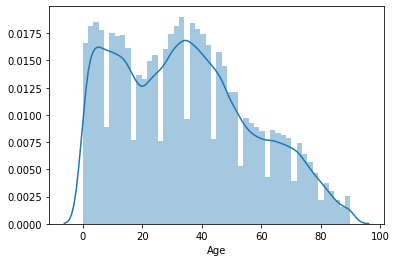

In [13]:
#create distribution plot of Age
sns.distplot(census['Age'])

In [14]:
print (census['Major Industry Code'].describe())
print ("________________________________")

count                           199523
unique                              24
top        Not in universe or children
freq                            100684
Name: Major Industry Code, dtype: object
________________________________


The most common value of "Major Industry Code" is "Not in universe or children". This accounts for 100684 individuals, or about 50% of observations.

In [15]:
print (census['Education'].describe())
print ("________________________________")

count                    199523
unique                       17
top        High school graduate
freq                      48407
Name: Education, dtype: object
________________________________


The most common value of "Education" is "High school graduate". Individuals with High school graduate as their highest level of education accounts for 24.26%, or about a quarter of instances. 

In [16]:
census['Education'].unique()

array([' High school graduate', ' Some college but no degree',
       ' 10th grade', ' Children', ' Bachelors degree(BA AB BS)',
       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Less than 1st grade',
       ' Associates degree-academic program', ' 7th and 8th grade',
       ' 12th grade no diploma', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' 11th grade', ' Doctorate degree(PhD EdD)', ' 9th grade',
       ' 1st 2nd 3rd or 4th grade'], dtype=object)

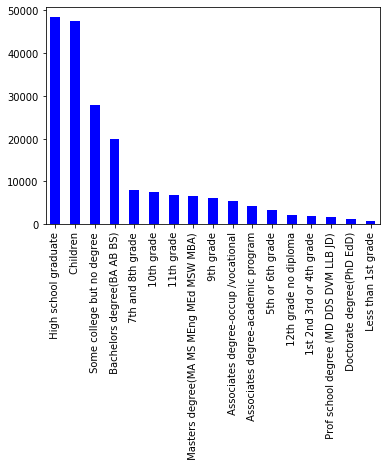

In [17]:
#create bar plot of education
census.Education.value_counts().plot(kind='bar', color='b')


In [18]:
print (census['Sex'].describe())
print ("________________________________")

count      199523
unique          2
top        Female
freq       103984
Name: Sex, dtype: object
________________________________


The split between male and female observations is nearly even, with females having slightly higher representation at 52.12%. 

In [19]:
print (census['Citizenship'].describe())
print ("________________________________")

count                                 199523
unique                                     5
top        Native- Born in the United States
freq                                  176992
Name: Citizenship, dtype: object
________________________________


In [20]:
census['Citizenship'].unique()

array([' Native- Born in the United States',
       ' Foreign born- Not a citizen of U S ',
       ' Foreign born- U S citizen by naturalization',
       ' Native- Born abroad of American Parent(s)',
       ' Native- Born in Puerto Rico or U S Outlying'], dtype=object)

The most common citizenship status is "Native-Born in the United States". There are five unique types of values for citizenship. These are listed directly below. Native-Born in the United States citizens account for 176992 of individuals, or 88.7%. 

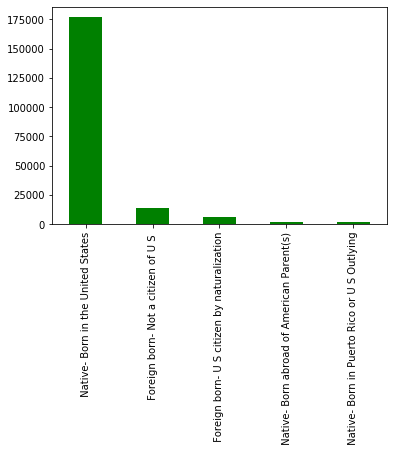

In [21]:
#create bar plot of citizenship
census.Citizenship.value_counts().plot(kind='bar', color='g')


_____________________________________________________

In [22]:
print (census['Race'].describe())
print ("________________________________")

count     199523
unique         5
top        White
freq      167365
Name: Race, dtype: object
________________________________


The most common race reported is overwhelmingly "White". We can see from the histogram below that the number of White observations dwarves all other races. 

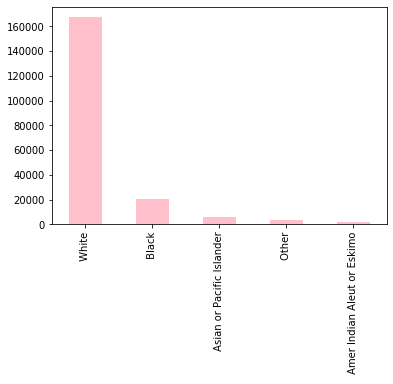

In [23]:
#create barplot of race
census.Race.value_counts().plot(kind='bar', color='pink')

## Attribute Visualization 

We found in our exploration of the Simple Statistics section above that the mode of 'Wage per hour' is \$0. A histogram of 'Wage per hour' was created to gain a better understanding of the distribution of this attribute. As seen below, a massive portion of the respondents reported earning $0 per hour. This could be due to a large number of children or unemployed respondents, or simply non-responses.

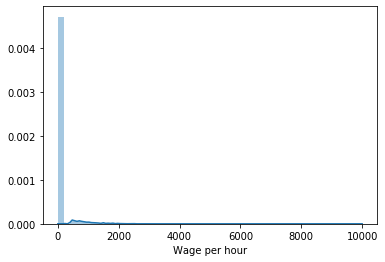

In [24]:
#create distribution plot of wage per hour
sns.distplot(census['Wage per hour'])

To get a better idea of the distribution, a subset of the data was created which included only records which reported a positive Wage per hour.

AxesSubplot(0.125,0.125;0.775x0.755)


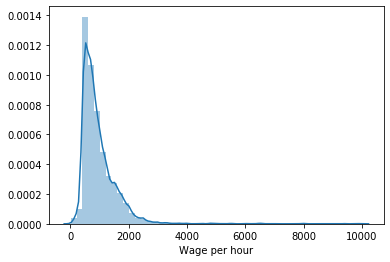

In [25]:
#Subset of census with positive Wage per hour
census_earners = census[census['Wage per hour'] > 0]
print(sns.distplot(census_earners['Wage per hour']))

The two tables below show a summary of Wages per hour for both sets of data (inlcuding and excluding the "\$0 earners"). Eliminating the zeros may be important in analyses attempting to regress or predict wages, to avoid reporting children or unemployed adults. Also of note, is that when looking at only earners, the median of the data set is $800. It is extremely unlikely that this is a legitimate report of a realistic median wage, especially for 1994. According to the U.S. Social Security Administration, the average annual salary per worker in 1994 was roughly \$24,000 (https://www.ssa.gov/oact/cola/awidevelop.html), making this more likely to be a biweekly earnings number, rather than a Wage per hour. Regardless, the distribution seems to follow the expected right-skewed normal distribution common for data on income. Although the coefficient, in a regression, may not be concretely interpreted, the variable still has value as a relative measure of earnings (of some interval) between records.

In [26]:
print('Wage Per Hour Total')
print(census['Wage per hour'].describe())
print('\n')
print('Wage Per Hour for Positive Earners')
print(census_earners['Wage per hour'].describe())

Wage Per Hour Total
count    199523.000000
mean         55.426908
std         274.896454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9999.000000
Name: Wage per hour, dtype: float64


Wage Per Hour for Positive Earners
count    11304.000000
mean       978.321214
std        656.483129
min         20.000000
25%        584.750000
50%        800.000000
75%       1200.000000
max       9999.000000
Name: Wage per hour, dtype: float64


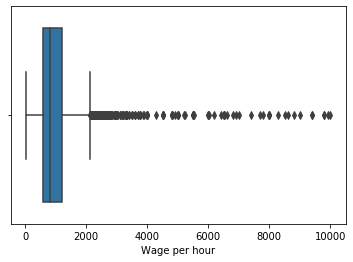

In [27]:
#create boxplot of wage per hour
wagebox = sns.boxplot(x=census_earners["Wage per hour"])

We can tell that "Wage per hour" falls largely between \$584 and \$1200. We refer to "Wage per hour" as bi-weekly pay, as the data suggests that this is what the variable is actually measuring. This pay is largely right-skewed, as what we'd expect to see in the general population.

We are also interested in how our biweekly pay variables predict whether total person income falls above or below fifty thousand dollars. In a perfect world, biweekly pay and total person income should be almost perfectly linearly related. However, factors like taxes, annuities, dividends, and other financial tools may effect the relationship between pay and total income. 

Above 50 K : 556
--------------------------------------
Below 50 K : 10748


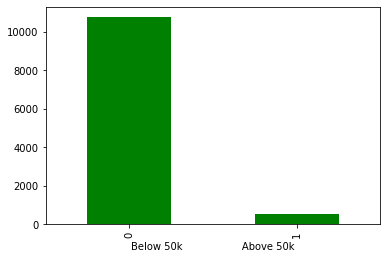

In [28]:
#create barchart of individuals making +/- 50k among wage > 0 group
fiftykbar = census_earners.fiftyk.value_counts().plot(kind='bar', color='g')
fiftykbar.set_xlabel("Below 50k"  "                   "   "Above 50k")
above50 = census_earners[census_earners.fiftyk == 1]
below50 = census_earners[census_earners.fiftyk == 0]

print ("Above 50 K :", above50.fiftyk.count())
print ("--------------------------------------" )
print ("Below 50 K :", below50.fiftyk.count())


We find that only 556 earners make above 50,000 and 10,748 of earners make below 50,000. Keep in mind that this subset of data are for individuals who also make more than 0 biweekly. 
We decide to see whether there are observations for which biweekly pay is reported to be 0 or below, but the individual still makes above 50,000 in total person income.

Above 50 K : 12382
--------------------------------------
Below 50 K : 187141


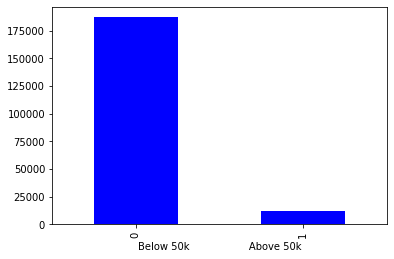

In [29]:
#create barchart of individuals making +/- 50k among all instances
fiftykbartot = census.fiftyk.value_counts().plot(kind='bar', color='b')
fiftykbartot.set_xlabel("Below 50k"  "                   "   "Above 50k")
above50tot = census[census.fiftyk == 1]
below50tot = census[census.fiftyk == 0]

print ("Above 50 K :", above50tot.fiftyk.count())
print ("--------------------------------------" )
print ("Below 50 K :", below50tot.fiftyk.count())

We find that there is a difference of 11826 observations for which biweekly pay is not greater than 0, but the individual still makes above 50k. Income may be from dividends, retirement, or other payments not directly reported in biweekly pay checks. Our goal is to figure out what individual traits are correlated with the probability of making over 50,000.

We will use our total dataset to visualize whether Citizenship, Education, or Sex plays into whether total person income is above or below \$50k. 

In [30]:
#group by citizenship
census_citizen = census.groupby(by="Citizenship")
a = census_citizen['fiftyk'].sum()
b = census_citizen['fiftyk'].count()
print ("Percentage Above 50k by Citizenship Status")
print ("----------------------------------")
citizenrate = a/b*100
print (citizenrate)

Percentage Above 50k by Citizenship Status
----------------------------------
Citizenship
 Foreign born- Not a citizen of U S             3.671368
 Foreign born- U S citizen by naturalization    9.906063
 Native- Born abroad of American Parent(s)      7.289294
 Native- Born in Puerto Rico or U S Outlying    2.172482
 Native- Born in the United States              6.299155
Name: fiftyk, dtype: float64


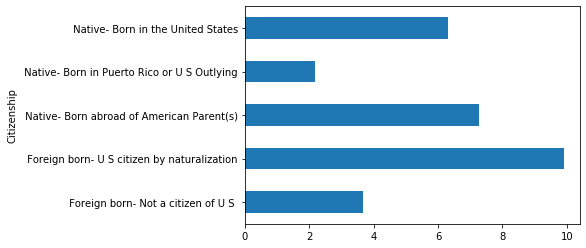

In [31]:
#create barplot of percentage of instances making above 50k by citizenship status
citizenbar = citizenrate.plot(kind='barh')

We see here that out of the foreign born - US citizen by naturalization group, about 10% make above 50k and that that the lowest percentage making above \$50k come from the native-born in Puerto Rico or US Outlying group. 

Percentage Above 50k by Education
----------------------------------


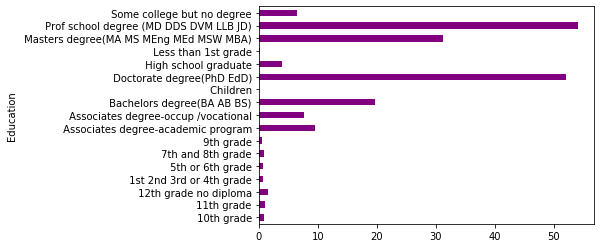

In [32]:
#create barplot of percentage of instances making above 50k by education
census_education = census.groupby(by="Education")
c = census_education['fiftyk'].sum()
d = census_education['fiftyk'].count()
print ("Percentage Above 50k by Education")
print ("----------------------------------")
educationrate = c/d*100
educationbar = educationrate.plot(kind='barh', color='purple')

Our visualization of earners above 50K by education shows that for those holding professional degrees or doctorate degrees, more than half of them are making above 50k. A little over 30% of Masters degree holders are making over 50k, and about 20% of Bachelors are making above 50k. Individuals with less education are much less likely to make over 50k.

Percentage Above 50k by Sex
----------------------------------


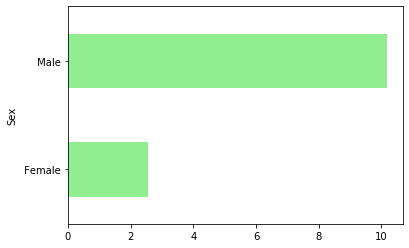

In [33]:
#create barplot of percentage of instances making above 50k by Sex
census_sex = census.groupby(by="Sex")
e = census_sex['fiftyk'].sum()
f = census_sex['fiftyk'].count()
print ("Percentage Above 50k by Sex")
print ("----------------------------------")
sexrate = e/f*100
sexbar = sexrate.plot(kind='barh', color='lightgreen')

We are also not surprised find that about 10% of Male earners make more than \$50K while only about 2% of Females make above \$50k. 

_______________________________________________________

## Joint Attribute Visualization 

Visualization of joint attributes was utlized to more quickly discern the nature of certain variables.

Below are the pairwise scatter plots for Wage per hour, Capital Gains, Capital Losses, and Age. Of note, is that he histograms for Capital Gains and Capital Losses have the same \$0-emphasis seen in Wage per hour above. A similar approach may need to be taken when utilizing these variables in an analysis.

Another strange distribution can be seen in the pairwise plot of Capital Gains against Capital Losses. The measures seem to be a sort of net count; that is, there exist either gains, losses, or neither. It could be expected that a person with significant capital gains would also accrue some degree of losses, but in the case of this dataset, only a final balance between the two is reported. Thus, attempting to discover a relationship between the two does not appear worthwhile. 
To address this, a new variable calculating the difference between Gains and Losses could be created to form a single measure.

The rest of the pairs have somewhat random distributions, except for an emphasis on the minimums and maximums for each value. 

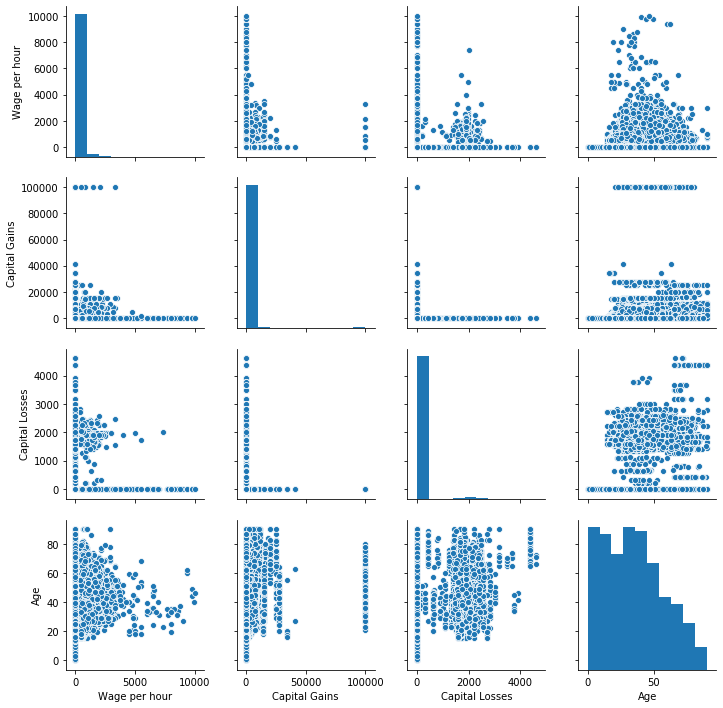

In [34]:
sns.pairplot(census, vars=["Wage per hour","Capital Gains","Capital Losses","Age"])

Another approach for exploring joint attributes can be seen below. The interaction between 'Age' and 'Wage per hour' is plotted with a regression line, separated by sex. From a tentative look at the graph, it appears that men's incomes have a more positive increase with age than women's incomes. However, both graphs generally follow the same trend, suggesting that pay increases with in most instances.  

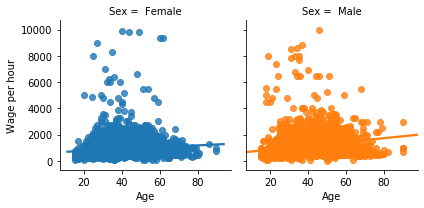

In [35]:
#Regression plots for wage over age, grouped by sex
g = sns.FacetGrid(census_earners, col="Sex", hue='Sex')  
g.map(sns.regplot, "Age", "Wage per hour")

Now, we would like to take a closer look into how education and age relates to the biweekly pay. 

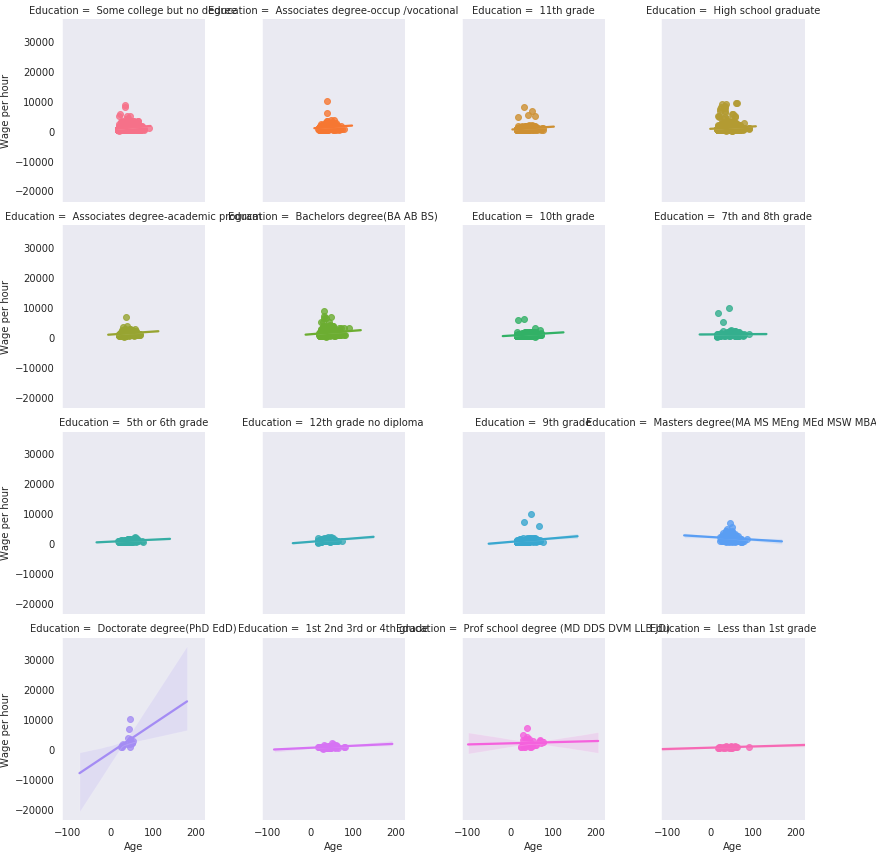

In [36]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(census_earners, col="Education", hue='Education',col_wrap=4)  
    g.map(sns.regplot, "Age", "Wage per hour")

In the graphs above we can see that there are several Educations for individual school grades that can be consolidated and appear to be similar in the graphs above.

We note here that there are a significant amount of people with Full-time schedules that also have no wage per hour. It is specualated that this data contains salary paid employees that do not necessary get paid on the time frame on which the "Wage per hour" variable was reported. This being the case, we may find that those individuals with full-time schedules are more likely to make above \$50k per year. We decide to take a deeper look into this. 

In [37]:
#crosstabulate full or part time and fiftyk
census_fulltime = pd.crosstab([ census['Full or Part Time'] ], 
                       census.fiftyk.astype(bool))
print (census_fulltime)



fiftyk                                False  True 
Full or Part Time                                 
 Children or Armed Forces            117895   5874
 Full-time schedules                  35370   5366
 Not in labor force                   26346    462
 PT for econ reasons usually FT         494     31
 PT for econ reasons usually PT        1054    155
 PT for non-econ reasons usually FT    2929    393
 Unemployed full-time                  2228     83
 Unemployed part- time                  825     18


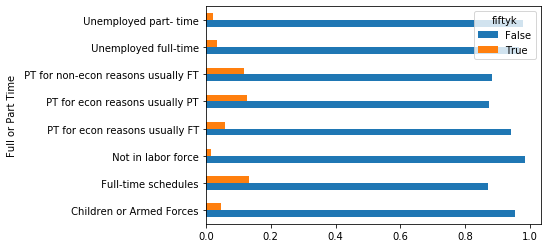

In [38]:
#find percentage of types of workers making above 50k
fulltime_rate = census_fulltime.div(census_fulltime.sum(1).astype(float),
                             axis=0) # normalize the value

fulltime_rate.plot(kind='barh')

Through our visualization we find there the is not much weight behind the hypothesis that those individuals with full-time working status are more likely to make above 50K. We certainly see that a larger percentage of full time workers make 50K, but it is not by a huge amount compared to the other types of workers.

_________________________________________________________

## Explore Attributes and Class


We were able to visualize how our attributes of interest relate to reported to "Wage per Hour", or bi-weekly pay. We now will look at the relationship between citizenship, education, and the likelihood of making over 50,000. We have already explored the within-group relationship of citizenship status and making above 50k as well as the within-group relationship of education and making above 50k. We had found that the foreign born - US citizens by naturalization were most likely to make above 50k, and native-born in Puerto Rico or Outlying citizens were least likely to make above 50k. We also found that professional degree, doctorate degree, and masters degree holders had the highest percentage of individuals making above 50k.

We now will also look at the Major Industry Code to see if there are occupations in which an individual is more likely to make above \$50,000. 

In [39]:
industry = pd.crosstab([ census['Major Industry Code'] ], 
                       census.fiftyk.astype(bool))
print (industry)

fiftyk                                False  True 
Major Industry Code                               
 Agriculture                           2845    178
 Armed Forces                            28      8
 Business and repair services          5032    619
 Communications                         911    270
 Construction                          5451    533
 Education                             7392    891
 Entertainment                         1538    113
 Finance insurance and real estate     5026   1119
 Forestry and fisheries                 161     26
 Hospital services                     3479    485
 Manufacturing-durable goods           7521   1494
 Manufacturing-nondurable goods        6041    856
 Medical except hospital               4083    600
 Mining                                 417    146
 Not in universe or children          99778    906
 Other professional services           3438   1044
 Personal services except private HH   2832    105
 Private household services    

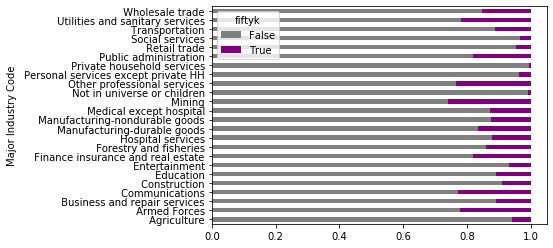

In [40]:
industry_rate = industry.div(industry.sum(1).astype(float),
                             axis=0) # normalize the value

industry_rate.plot(kind='barh', 
                   stacked=True, 
                   color = ['grey', 'purple'])


In [41]:
print (industry_rate)

fiftyk                                   False     True 
Major Industry Code                                     
 Agriculture                          0.941118  0.058882
 Armed Forces                         0.777778  0.222222
 Business and repair services         0.890462  0.109538
 Communications                       0.771380  0.228620
 Construction                         0.910929  0.089071
 Education                            0.892430  0.107570
 Entertainment                        0.931557  0.068443
 Finance insurance and real estate    0.817901  0.182099
 Forestry and fisheries               0.860963  0.139037
 Hospital services                    0.877649  0.122351
 Manufacturing-durable goods          0.834276  0.165724
 Manufacturing-nondurable goods       0.875888  0.124112
 Medical except hospital              0.871877  0.128123
 Mining                               0.740675  0.259325
 Not in universe or children          0.991002  0.008998
 Other professional services   

We can see that among the Major Industries: Armed Forces, Communications, Mining, Other Professional Services, and Utilities and sanitay services, over 20% of individuals report making more than \$50K. The industries for which less than 5% of individuals make over \$50K are Personal services except private HH, Private household services, Retail trade, and Social services. 

_____________________________________________________

## New Features 

New features we had to add through our visualizations were slight manipulations to our current attributes. We have added the Education Group column that classifies the highest degree that the individual has earned. Also, the syntax for the Above or Below 50000 is not the easiest to deal with. We created a new binary attribute 'fiftyk' that simply indicated 1 for above \$50K and 0 for below \$50K. In the next section for Exceptional Work, we will create the dummy variables and focus on "Above 50000" with a 0/1 indicator in a different way that is described below.

______________________________________________

## Exceptional Work

*We want to do a logistic regression to explain whether a person will have the income above or below 50,000.* I have utilized get_dummies to make the variable 'Above or Below 50000' binary. 

In [42]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

dummy_ranks = pd.get_dummies(census['Above or Below 50000'], prefix='Above or Below 50000')
dummy_ranks.columns=['Above 50000', 'Below 50000']
dummy_ranks.head()

,Above 50000,Below 50000
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


To use the logistic regression, we create dummy variables with false represented as 0 and true as 1. Specifically we will use the Above 50000 column setting it as our target variable. This is accomplished for the 'Above or Below 50000' above, but we shall create dummy variables for Marital Status to see how the different marital statuses affect whether the annual salary is above or below $50,000.

In [43]:
d_ranks = pd.get_dummies(census['Marital Status'], prefix='Marital Status')
d_ranks.head()

,Marital Status_ Divorced,Marital Status_ Married-A F spouse present,Marital Status_ Married-civilian spouse present,Marital Status_ Married-spouse absent,Marital Status_ Never married,Marital Status_ Separated,Marital Status_ Widowed
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


Next, we will join the previously generated dummy variables to other attributes we'd like to use in our analysis.

In [44]:
data = census.join(dummy_ranks['Above 50000'])
cols_to_keep = ['Above 50000', 'Age', 'Wage per hour','Weeks worked in year', 'Capital Losses', 'Capital Gains']
data1 = data[cols_to_keep]
data2 = data1.join(d_ranks.ix[:, 'Marital Status_ Married-A F spouse present':])
data2['Intercept'] = 1.0
data2.head()

,Above 50000,Age,Wage per hour,Weeks worked in year,Capital Losses,Capital Gains,Marital Status_ Married-A F spouse present,Marital Status_ Married-civilian spouse present,Marital Status_ Married-spouse absent,Marital Status_ Never married,Marital Status_ Separated,Marital Status_ Widowed,Intercept
0,0,73,0,0,0,0,0,0,0,0,0,1,1.0
1,0,58,0,52,0,0,0,0,0,0,0,0,1.0
2,0,18,0,0,0,0,0,0,0,1,0,0,1.0
3,0,9,0,0,0,0,0,0,0,1,0,0,1.0
4,0,10,0,0,0,0,0,0,0,1,0,0,1.0


Finally, we will run the logistic regression.

In [45]:
train_cols = data2.columns[1:]
logit = sm.Logit(data2['Above 50000'], data2[train_cols])
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                           Logit Regression Results                           
Dep. Variable:            Above 50000   No. Observations:               199523
Model:                          Logit   Df Residuals:                   199511
Method:                           MLE   Df Model:                           11
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:                     inf
Time:                        15:10:57   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Age                                                 0.0332      0.001     39.359      0.000       0.032       0.035
Wage per hour       

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Above we can see that all variables but one (Marital Status_ Married-spouse absent) is statistically significant when determining whether a person's income will be Above 50000.

In [46]:
print (result.conf_int())

                                                        0         1
Age                                              0.031589  0.034899
Wage per hour                                   -0.000239 -0.000119
Weeks worked in year                             0.059263  0.062549
Capital Losses                                   0.000797  0.000875
Capital Gains                                    0.000168  0.000181
Marital Status_ Married-A F spouse present      -1.213582 -0.081874
Marital Status_ Married-civilian spouse present  0.396836  0.540758
Marital Status_ Married-spouse absent           -0.334337  0.143360
Marital Status_ Never married                   -0.471369 -0.278545
Marital Status_ Separated                       -0.554771 -0.186527
Marital Status_ Widowed                         -0.521387 -0.236940
Intercept                                       -6.997363 -6.711373


Regression coefficients and confidence intervals are provided for each attribute. An interesting note is that have Marital Status as "Married-civilian spouse present" has a coefficient that would increase the wage per hour while all other martial statuses decrease the wage per house.

For the future it would be very interesting to group Martial Status. We can make a grouping of Married grouping Married-A F spouse present, Married-civilian spouse present, and Married-spouse absent. We can run the logistic regression and see if the signifcance of the variables will change.

____________________________________________________

## Conclusion 

Visualization is a powerful tool for quickly discerning the details of large data sets. We began our visualization with a basic look at the data frame itself, and gained a better understanding of its entirety by viewing the attributes and their associated simple statistics. Some of these statistics pointed to issues with the data—for example, we discovered that wages, along with capital gains and losses, were recorded with maximum values, above which all values were rounded down.
 
With an eye toward eventually completing a regression to discover the effects of attributes like age, race, or gender on wages, our visualizations continued.  Histograms showing the distributions of such variables as age, education, and wage per hour, helped us to understand the relative frequencies for each of the attributes; an understanding which will be important to carry with us into future analyses. The histogram of wage per hour pointed out that most respondents reported earning no money at all, and eliminating the “$0” responses created a histogram which much more closely follows the normal distribution necessary for a linear regression to be achieved correctly. Later, summary statistics and a boxplot for “Wage per hour” indicated that the attribute may actually measure bi-weekly pay, an invaluable insight when interpreting regression results.
 
Bar charts made it obvious that certain groups were starkly underrepresented. Regarding the “Education” attribute, a huge portion of respondents were either children, or were High-school graduates, while significantly fewer reported having a “Less than 1st grade” education.  A bar chart of “Citizenship” showed that almost all respondents were native born in the United States. The binary variable showing whether respondents earned above or below 50,000 annually had a similar imbalance, with almost all respondents contained in the latter group. Another bar chart quickly showed that roughly 10\% of male respondents earn more than 50,000, compared to only 2\% of women.
 
Pairwise scatterplots for many of the continuous variables of interest pointed out the mutual exclusivity of Capital Gains and Capital Losses, indicating that the two variables were a “net count.” Each record contained only gains, losses, or neither. This is an important understanding because, in a regression, the two variables could simply be combined by subtracting each records losses from their gains to create a single continuous variable, thereby simplifying the regression and its interpretation. The scatterplots also indicated a heavy emphasis on the minimums/maximums for each response, with the exception of “Age.” Creating a quick regression plot for the joint attributes of age and wage per hour, separated by sex, showed that men’s incomes tend to have a more positive response toward age than women’s. A similar visualization showed the effects of different education levels on the response of income to age.
 
Not only did each of these visualizations come to help us understand the data as a whole, along with its shortcomings, but the insights afforded by these visualizations were directly applied to performing a more effective logistic regression than could have been completed otherwise.